PREVIOUS STEPS FROM THE TEAM: 

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
pathway_ID_list = pd.read_csv('http://rest.kegg.jp/list/pathway/hsa', delimiter = "\t", header = None)
pathway_ID_list.columns = ["pathway_ID", "pathway_name"]
# pathway_ID_list

In [6]:
geneID_geneName = pd.read_csv("http://rest.kegg.jp/list/hsa", sep = "\t", header = None)
geneID_geneName.columns = ["gene_ID", "gene_name"]
# geneID_geneName

In [7]:
pathway_to_gene = pd.read_csv("http://rest.kegg.jp/link/pathway/hsa", sep = "\t", header = None)
pathway_to_gene.columns = ["gene_ID", "pathway_ID"]
# pathway_to_gene

In [8]:
def get_map_gene_pathways(links_gene_pathway): 
    """
    Compute the map of each gene and the set of pathways the gene is in.

    Parameters:
    links_gene_pathway (pandas.DataFrame): The dataframe of links between genes and pathways.

    Returns:
    map_gene_pathways (dict): The map of each gene and the set of pathways the gene is in.

    """
    map_gene_pathways_info = links_gene_pathway.set_index("gene_ID").groupby(level = 0).apply(lambda pathways: list(pathways.pathway_ID))
    map_gene_pathways = dict(map_gene_pathways_info)
    return map_gene_pathways


In [9]:
def count_pathway(gene_ID, map_gene_pathways):
    """
    Count the number of pathways the given gene is in.

    Parameters:
    gene_ID (str): The KEGG ID of the gene.
    map_gene_pathways (dict): The map of each gene and the set of pathways the gene is in, which is generated by get_map_gene_pathways function.

    Returns:
    pathway_count (int): The number of pathways the given gene is in.

    """
    pathways = map_gene_pathways[gene_ID]
    pathway_count = len(pathways)
    return pathway_count


In [10]:
def get_gene_name(gene_ID, gene_name_info):
    """
    get the name of the given gene.

    Parameters:
    gene_ID (str): The KEGG ID of the gene.
    gene_name_info (pandas.DataFrame): The dataframe of KEGG ID and names of all genes.

    Returns:
    gene_name (str): The name of the given gene.

    """
    gene_name = gene_name_info.gene_name[gene_name_info.gene_ID == gene_ID]
    return gene_name

In [11]:
def get_pathway_name(pathway_ID, pathway_name_info): 
    """
    get the name of the given pathway.

    Parameters:
    pathway_ID (str): The KEGG ID of the pathway.
    pathway_name_info (pandas.DataFrame): The dataframe of KEGG ID and names of all pathways.

    Returns:
    pathway_name (str): The name of the given pathway.

    """
    pathway_name = pathway_name_info.pathway_name[pathway_name_info.pathway_ID == pathway_ID]
    return pathway_name

In [12]:
# create a dictionary with genes as keys and pathways as values using 
#information of links between genes and pathways
map_gene_pathways = get_map_gene_pathways(pathway_to_gene)

# count the number of pathways of each gene
pathway_counts = {"gene_ID": map_gene_pathways.keys(), 
                  "pathway_count": [count_pathway(gene_ID, map_gene_pathways) for gene_ID in map_gene_pathways.keys()], 
                  "pathway_IDs": map_gene_pathways.values()}
pathway_counts = pd.DataFrame(pathway_counts).sort_values("pathway_count", ascending = False)
pathway_counts.iloc[:10, ]

,gene_ID,pathway_count,pathway_IDs
5209,hsa:5595,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
5208,hsa:5594,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4740,hsa:5291,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4739,hsa:5290,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4742,hsa:5293,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4744,hsa:5295,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4745,hsa:5296,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
7296,hsa:8503,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
1640,hsa:207,100,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
1646,hsa:208,100,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."


STEP 5: RETRIEVE A SET OF THE PATHWAYS ON WHICH THE TOP 3 GENES APPEAR.

In [16]:
#subset for the top genes. We chose 8 genes since there was an overlap of number of pathways. 
genes_want = pathway_counts.iloc[:8, :]
genes_want

,gene_ID,pathway_count,pathway_IDs
5209,hsa:5595,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
5208,hsa:5594,117,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4740,hsa:5291,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4739,hsa:5290,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4742,hsa:5293,106,"[path:hsa00562, path:hsa01100, path:hsa01521, ..."
4744,hsa:5295,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
4745,hsa:5296,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."
7296,hsa:8503,103,"[path:hsa01521, path:hsa01522, path:hsa01524, ..."


In [31]:
#here we are retrieving only the pathways for those eight genes. 
genes_want.loc[:, "pathway_IDs"]

5209    [path:hsa01521, path:hsa01522, path:hsa01524, ...
5208    [path:hsa01521, path:hsa01522, path:hsa01524, ...
4740    [path:hsa00562, path:hsa01100, path:hsa01521, ...
4739    [path:hsa00562, path:hsa01100, path:hsa01521, ...
4742    [path:hsa00562, path:hsa01100, path:hsa01521, ...
4744    [path:hsa01521, path:hsa01522, path:hsa01524, ...
4745    [path:hsa01521, path:hsa01522, path:hsa01524, ...
7296    [path:hsa01521, path:hsa01522, path:hsa01524, ...
Name: pathway_IDs, dtype: object

STEP 6: COMPUTE/DISPLAY A VENN DIAGRAM FOR THE NUMBER OF OVERLAPPING PATHWAYS FOR THE TOP 3 GENES.

In [43]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

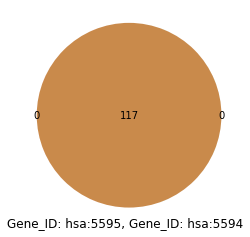

In [53]:
#below are the three individual Venn Diagrams to show there is no over-lap between the 
#genes that have the same number of pathways. 

set1 = set(genes_want.loc[5209, "pathway_IDs"])
set2 = set(genes_want.loc[5208, "pathway_IDs"])
venn2([set1, set2], ("Gene_ID: hsa:5595, ", "Gene_ID: hsa:5594"), alpha = 0.7)
plt.show()

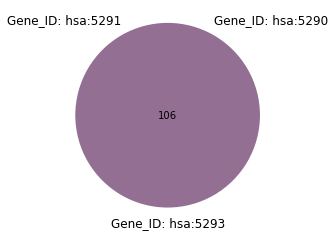

In [55]:
set1 = set(genes_want.loc[4740, "pathway_IDs"])
set2 = set(genes_want.loc[4739, "pathway_IDs"])
set3 = set(genes_want.loc[4742, "pathway_IDs"])
venn3([set1, set2, set3], ("Gene_ID: hsa:5291", "Gene_ID: hsa:5290", "Gene_ID: hsa:5293"), alpha = 0.7)
plt.show()

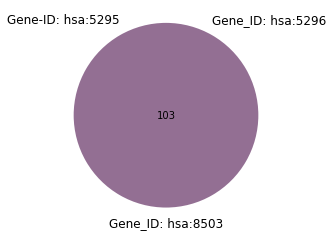

In [56]:
set1 = set(genes_want.loc[4744, "pathway_IDs"])
set2 = set(genes_want.loc[4745, "pathway_IDs"])
set3 = set(genes_want.loc[7296, "pathway_IDs"])
venn3([set1, set2, set3], ("Gene-ID: hsa:5295", "Gene_ID: hsa:5296", "Gene_ID: hsa:8503"), alpha = 0.7)
plt.show()

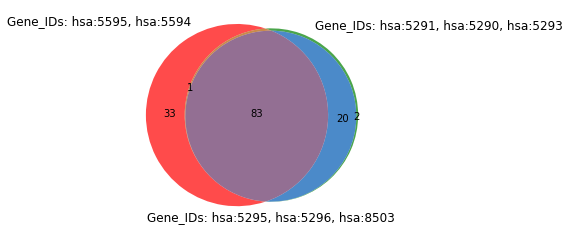

In [62]:
#below is the final Venn Diagram where I chose one gene from each pathway count category and placed it in this Venn Diagram.
#I did label each group though with all the names of the genes in that pathway count category. 

set1 = set(genes_want.loc[5209, "pathway_IDs"])
set2 = set(genes_want.loc[4740, "pathway_IDs"])
set3 = set(genes_want.loc[4744, "pathway_IDs"])
venn3([set1, set2, set3], ("Gene_IDs: hsa:5595, hsa:5594", "Gene_IDs: hsa:5291, hsa:5290, hsa:5293",
                           "Gene_IDs: hsa:5295, hsa:5296, hsa:8503"), alpha = 0.7)
plt.show()